## Authors: Sarper Karabaş 


Imported some libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')


Reading BTC-USD dataset, using pandas.

In [2]:
df = pd.read_csv("BTC-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-19,454.523987,454.632996,438.714996,438.714996,438.714996,96027400
1,2016-05-20,437.792999,444.053986,437.389008,442.675995,442.675995,81987904
2,2016-05-21,442.966003,443.778015,441.705994,443.187988,443.187988,42762300
3,2016-05-22,443.217987,443.427002,439.035004,439.322998,439.322998,39657600
4,2016-05-23,439.347992,444.345001,438.822998,444.154999,444.154999,50582500
...,...,...,...,...,...,...,...
1822,2021-05-15,49855.496094,50639.664063,46664.140625,46760.187500,46760.187500,59161047474
1823,2021-05-16,46716.636719,49720.042969,43963.351563,46456.058594,46456.058594,64047871555
1824,2021-05-17,46415.898438,46623.558594,42207.289063,43537.511719,43537.511719,74903638450
1825,2021-05-18,43488.058594,45812.457031,42367.832031,42909.402344,42909.402344,56187365084


When we check dataset, we see number of non-null and type of features examples. There aren't missing values on none of the features.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,9793.980061,10068.872675,9494.942927,9812.896077,9812.896077,1.648541e+10
std,12318.281260,12698.442214,11868.991148,12329.729563,12329.729563,2.092305e+10
min,437.792999,443.427002,437.389008,438.714996,438.714996,3.397780e+07
25%,3420.929077,3487.294800,3348.240356,3422.264038,3422.264038,1.639880e+09
50%,7171.450195,7324.984863,6940.700195,7176.414551,7176.414551,7.620590e+09
75%,10111.879882,10292.234375,9732.604981,10116.324707,10116.324707,2.384215e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [5]:
df.shape

(1827, 7)

This plot is showing the change of the highest and lowest price of BTC over the years. 

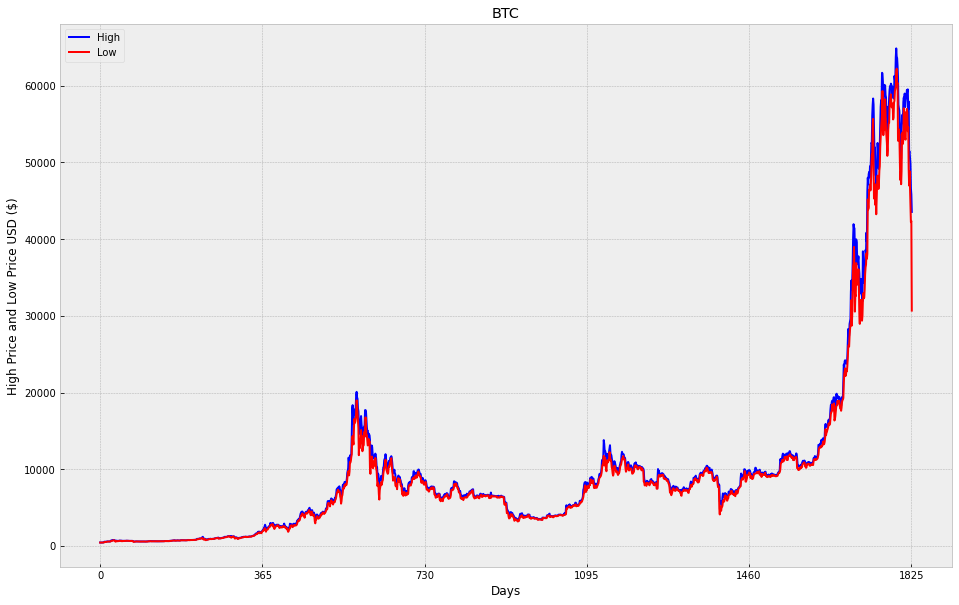

In [6]:
plt.figure(figsize = (16,10))
plt.title("BTC")
plt.xlabel("Days")
plt.ylabel("High Price and Low Price USD ($)")
plt.xticks([365*x for x in range(0,1827)])
plt.plot(df["High"],color="blue")
plt.plot(df["Low"],color="red")
plt.legend(["High", "Low"])
plt.show()

This plot is showing the change of the closing price of BTC over the years. 

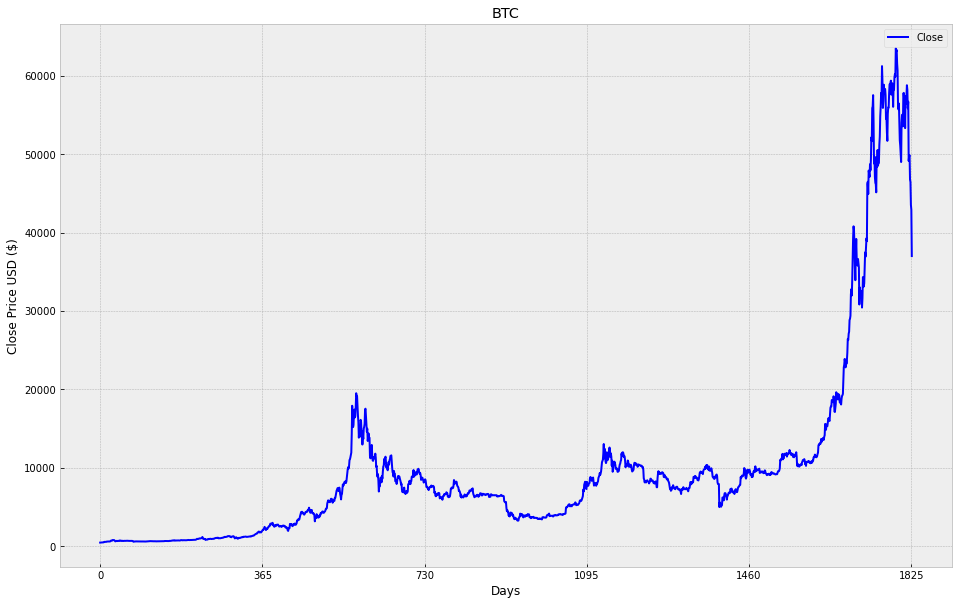

In [7]:
plt.figure(figsize = (16,10))
plt.title("BTC")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.xticks([365*x for x in range(0,1827)])
plt.plot(df["Close"],color='blue')
plt.legend(["Close"])
plt.show()

The first 10 items are showing below.

In [8]:
df = df[["Close"]]
df.head(10)

,Close
0,438.714996
1,442.675995
2,443.187988
3,439.322998
4,444.154999
5,445.980988
6,449.598999
7,453.384003
8,473.463989
9,530.039978


Created a new variable to predict 'x' days out into the future

In [9]:
future_days = 30

Prediction column was created by the values in the close column are shifted by future_days(30) days.

In [10]:
df["Prediction"] = df["Close"].shift(-future_days)
df.head(35)

,Close,Prediction
0,438.714996,756.226990
1,442.675995,763.781006
2,443.187988,737.226013
3,439.322998,666.651978
4,444.154999,596.116028
5,445.980988,623.976990
6,449.598999,665.299011
7,453.384003,665.122986
8,473.463989,629.367004
9,530.039978,655.275024


Last 35 items are showen below. The last 30 blank items show that the shifting was applied successfully.

In [11]:
df.tail(35)

,Close,Prediction
1792,63314.011719,46760.187500
1793,61572.789063,46456.058594
1794,60683.820313,43537.511719
1795,56216.183594,42909.402344
1796,55724.265625,37002.441406
1797,56473.031250,NaN
1798,53906.089844,NaN
1799,51762.273438,NaN
1800,51093.652344,NaN
1801,50050.867188,NaN


### Preprocessing

X label of the model will be Close column without the last 30(future_days) items. Values assigned to an array.

In [12]:
X = np.array(df.drop(["Prediction"],1))[:-future_days]
print(X)

[[  438.714996]
 [  442.675995]
 [  443.187988]
 ...
 [60683.820313]
 [56216.183594]
 [55724.265625]]


y label of the model will be the Prediction column without the last 30(future_days) items. Values assigned to an array.

In [13]:
y = np.array(df["Prediction"])[:-future_days]
print(y)

[  756.22699    763.781006   737.226013 ... 43537.511719 42909.402344
 37002.441406]


Dividing the dataset into training and test sets. %80 training set and %20 test set.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape --> {X_train.shape}')
print(f'X_test shape --> {X_test.shape}')
print(f'y_train shape --> {y_train.shape}')
print(f'y_test shape --> {y_test.shape}')

X_train shape --> (1437, 1)
X_test shape --> (360, 1)
y_train shape --> (1437,)
y_test shape --> (360,)


Created a variable called x_future and set it equal to last 30(future_days) rows of data from the original dataset. These values will be predicted.

In [15]:
x_future = df.drop(["Prediction"],1)[-future_days:]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[56473.03125 ],
       [53906.089844],
       [51762.273438],
       [51093.652344],
       [50050.867188],
       [49004.253906],
       [54021.753906],
       [55033.117188],
       [54824.703125],
       [53555.109375],
       [57750.175781],
       [57828.050781],
       [56631.078125],
       [57200.292969],
       [53333.539063],
       [57424.007813],
       [56396.515625],
       [57356.402344],
       [58803.777344],
       [58232.316406],
       [55859.796875],
       [56704.574219],
       [49150.535156],
       [49716.191406],
       [49880.535156],
       [46760.1875  ],
       [46456.058594],
       [43537.511719],
       [42909.402344],
       [37002.441406]])

There are continuous outputs so the Regression method was used for this project. Regression is a supervised learning technique that enables us to predict the continuous output variable based on one or more variables. 

#### Model 1: Linear Regression

Linear Regression is used as the first model. Model is trained and predicted on training set. The Linear Regression technique is used with default variables. Calculated cross validation score is 0.9137.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train,y_train)

score = cross_val_score(lr,X_train,y_train,cv=10).mean()
print("Best Linear Regression: ", score.round(4))

Best Linear Regression:  0.9137


#### Model 2: Decision Tree Regression

Decision Tree Regression is used as second model. Model is trained and predicted on training set. The Decision Tree Regression technique is used with the default variables. Calculated cross validation score is 0.9204.


In [17]:
from sklearn.tree import DecisionTreeRegressor


dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
score = cross_val_score(dtr, X_train, y_train, cv=10).mean()
        
print(f'Best Decision Tree Regressor  --> {score.round(4)}')

Best Decision Tree Regressor  --> 0.9204


#### Model 3: Random Forest Regression

Random Forest Regression is used as third model. Model is trained and predicted on training set. The Random Forest Regression technique is used with different hyper parameters. For the n_estimators variable there are four options. After calculating for all the values(100,150,200,300), the value which gives the best score is chosen. Calculated cross validation score is 0.9415797.

In [55]:
from sklearn.ensemble import RandomForestRegressor

bestValue = (0,0)

for i in [100,150,200,300]:
    rfr = RandomForestRegressor(n_estimators=i)
    rfr.fit(X_train, y_train)
    score = cross_val_score(rfr, X_train, y_train, cv=10).mean()
    if score > bestValue[1]:
        bestValue=(i, score)
        
print(f'Best Random Forest Regressor (with max_depth = {bestValue[0]}) --> {bestValue[1].round(7)}')

Best Random Forest Regressor (with max_depth = 200) --> 0.9415797


#### Model 4: Ridge Regression

Ridge Regression is used as forth model. Model is trained and predicted on training set. The Ridge Regression algorithm was used with different hyper parameters. For the solver variable there is a for loop to chose the value of solver. After calculating for "auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga" , the value which gives the best score is chosen. Calculated cross validation score is 0.9142.

In [40]:
from sklearn.linear_model import Ridge

bestValue = (0,0)

for i in ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"] :
    ridge = Ridge(solver=i)
    ridge.fit(X_train,y_train)
    score = cross_val_score(ridge, X_train, y_train, cv=10).mean()
    if score > bestValue[1]:
        bestValue=(i, score)
print(f'Ridge Regression(solver = {bestValue[0]}) --> {bestValue[1].round(4)}')

Ridge Regression(solver = sag) --> 0.9142


#### Test

The best cross validation score was belonging to Random Forest Regression. So testing the test set with the Random Forest Regression.

In [57]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators=200)
randomForest.fit(X_train,y_train)
accuracy = randomForest.score(X_test,y_test)
print("Accuracy : ", accuracy)

Accuracy :  0.9489559383022984


The last 30 days which from Close column (x_future) are predicted with using Random Forest Regression.

In [62]:
randomForest_prediction = randomForest.predict(x_future)
print(randomForest_prediction)

[47833.7215431  53650.3982034  53205.62406276 58419.77457031
 58887.94578108 57467.34240213 53312.46580104 50843.02884751
 55794.37609386 52203.5126565  56641.19929691 59531.09150403
 48364.63398452 58790.68376974 52893.95787129 58790.68376974
 47833.7215431  58790.68376974 55498.0571098  56505.80765629
 56334.72066415 48629.22871115 57783.40363273 58654.35328107
 58891.8566014  57935.81144551 57914.04556659 57178.90011731
 53123.73554697 46292.5074223 ]


Valid data frame created with df. The unpredicted last 30 days which from df are assigned to valid data frame. Valid data frame is shown below.

In [63]:
predictions = randomForest_prediction

valid = df[X.shape[0]:]
valid

,Close,Prediction
1797,56473.031250,NaN
1798,53906.089844,NaN
1799,51762.273438,NaN
1800,51093.652344,NaN
1801,50050.867188,NaN
1802,49004.253906,NaN
1803,54021.753906,NaN
1804,55033.117188,NaN
1805,54824.703125,NaN
1806,53555.109375,NaN


The values (randomForest_prediction) that were predicted with Random Forest Regression are assigned to the Prediction column of valid data frame. And they are shown below.

In [65]:
valid["Prediction"] = predictions
valid

,Close,Prediction
1797,56473.031250,47833.721543
1798,53906.089844,53650.398203
1799,51762.273438,53205.624063
1800,51093.652344,58419.774570
1801,50050.867188,58887.945781
1802,49004.253906,57467.342402
1803,54021.753906,53312.465801
1804,55033.117188,50843.028848
1805,54824.703125,55794.376094
1806,53555.109375,52203.512657


Values of Prediction are added to tail of the values of Close.

In [69]:
valuesOfClose = np.array(df["Close"])
valuesOfPrediction = np.array(valid["Prediction"])
combinated_array = np.append(valuesOfClose,valuesOfPrediction)
combinated_array

array([  438.714996  ,   442.675995  ,   443.187988  , ...,
       57178.90011731, 53123.73554697, 46292.5074223 ])

Extended data frame is created with using combinated_array and shown below.

In [72]:
extended = pd.DataFrame(columns=["Plus30Days"])
extended["Plus30Days"] = combinated_array
extended

,Plus30Days
0,438.714996
1,442.675995
2,443.187988
3,439.322998
4,444.154999
...,...
1852,57935.811446
1853,57914.045567
1854,57178.900117
1855,53123.735547


This plot shows the prices of last five years and predicted values of future 30 days.

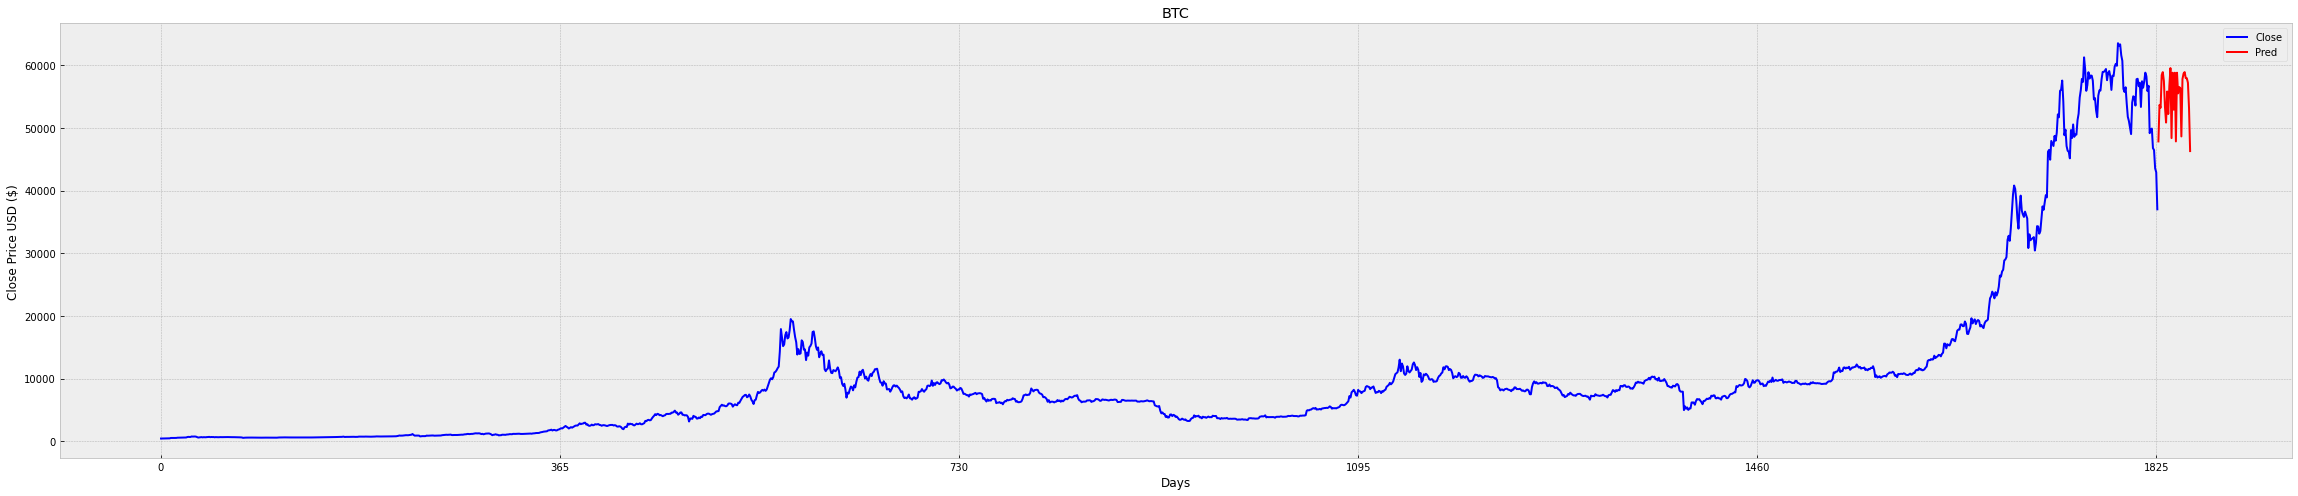

In [74]:
plt.figure(figsize = (40,8))
plt.title("BTC")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.xticks([365*x for x in range(0,1827)])
plt.plot(df["Close"],color="blue")
plt.plot(extended["Plus30Days"].tail(30),color="red")
plt.legend(["Close","Pred"])
plt.show()

This plot shows last year for showing predicted values of future 30 days clearly.

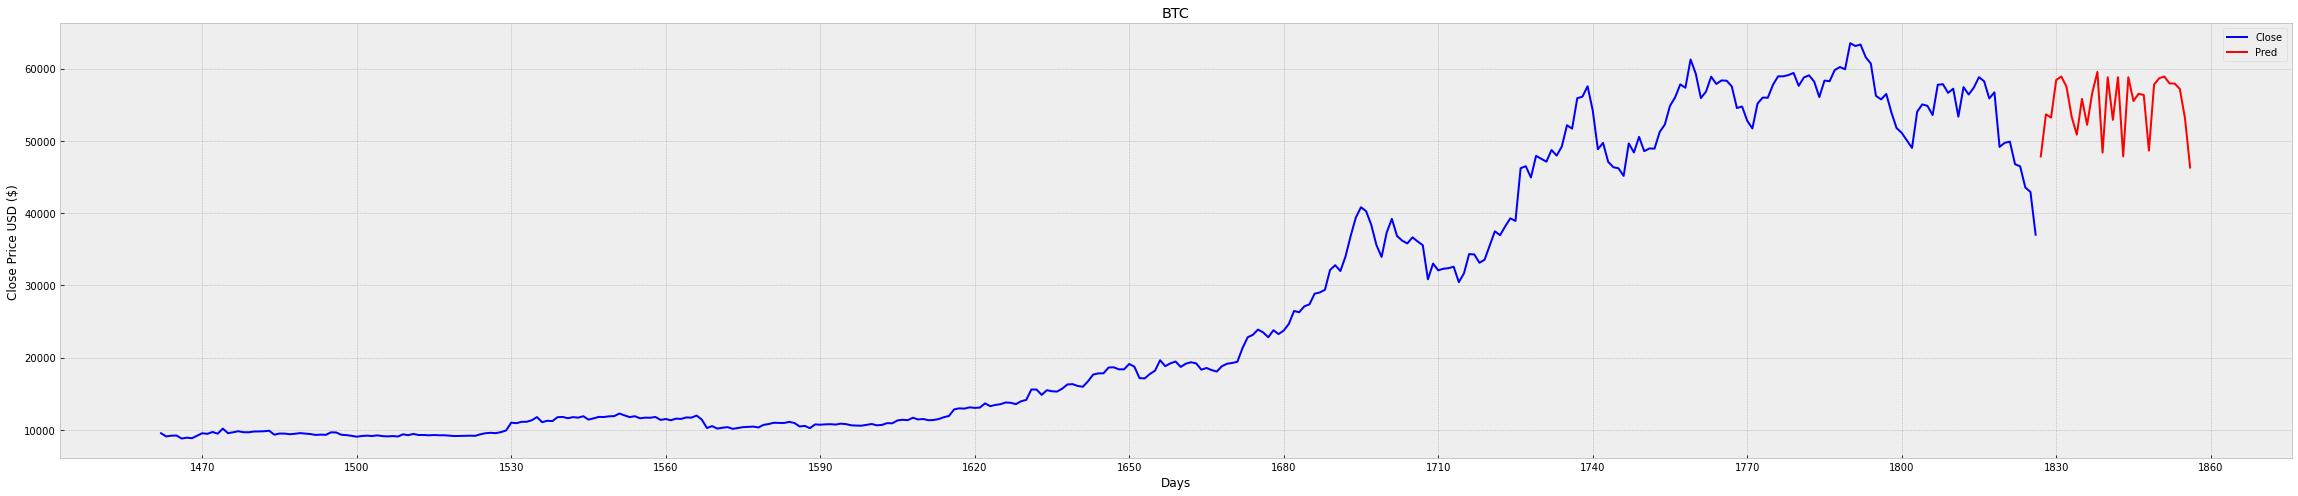

In [76]:
plt.figure(figsize = (40,8))
plt.title("BTC")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.xticks([30*x for x in range(0,1860)])
plt.plot(df["Close"].tail(365),color="blue")
plt.plot(extended["Plus30Days"].tail(30),color="red")
plt.legend(["Close","Pred"])
plt.show()

NOT A FINANCIAL ADVICE :)